In [1]:
!ls

detectron2_duckie.ipynb  duckie_to_coco_bezier.ipynb  merged_dataset
duckie_real_train.json	 duckie_to_coco.ipynb	      output
duckie_real_val.json	 input.jpg		      __pycache__
duckie_sim_val2.json	 merge_coco_datasets.ipynb    utils.py


# Getting Started
In the same folder as this repository, create a "data" folder, or a symbolic link to where you store the data.

In [2]:
from utils import DuckieVisualizer

In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow
from cv2_plt_imshow import cv2_plt_imshow as cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

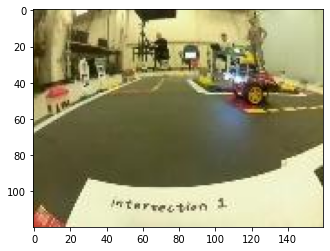

In [4]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("../data/dt_segmentation_dataset/real/imgs/frame0.jpg")
cv2_imshow(im)

In [5]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

/home/raphael/anaconda3/lib/python3.8/site-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629395347/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


In [6]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0, 62], device='cuda:0')
Boxes(tensor([[64.8575, 12.3402, 74.7061, 33.4640],
        [82.5865, 19.8824, 91.0546, 28.4474]], device='cuda:0'))


## Show a sample image from the dataset. 

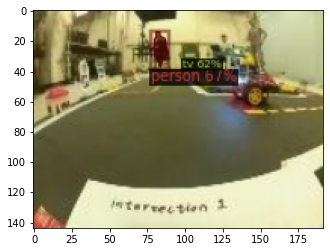

In [7]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

## Register COCO datasets
This assumes that the original dataset was converted from its original format to MS COCO using the "duckie_to_coco.ipynb" dataset, or downloaded from here.
- http://www.raphaeljean.com/files/duckie_sim_train.json
- http://www.raphaeljean.com/files/duckie_sim_val.json
- http://www.raphaeljean.com/files/dt_segmentation_dataset.zip



In [8]:
#!wget http://www.raphaeljean.com/files/duckie_sim_train.json
#!wget http://www.raphaeljean.com/files/duckie_sim_val.json
#!wget http://www.raphaeljean.com/files/dt_segmentation_dataset.zip

In [9]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("duckie_train", {}, "../data/duckie_sim_train.json", "../data/dt_segmentation_dataset/sim/rgb_160_120/")
register_coco_instances("duckie_val", {}, "../data/duckie_sim_val.json", "../data/dt_segmentation_dataset/sim/rgb_160_120/")
register_coco_instances("duckie_real_train", {}, "../data/duckie_real_train.json", "../data/dt_segmentation_dataset/real/imgs/")
register_coco_instances("duckie_real_val", {}, "../data/duckie_real_val.json", "../data/dt_segmentation_dataset/real/imgs/")
register_coco_instances("duckie_js_train", {}, "../data/duckie_js_train.json", "../data/dt_segmentation_dataset/new/wo_bezier/rgb_orig/")
register_coco_instances("duckie_js_val", {}, "../data/duckie_js_val.json", "../data/dt_segmentation_dataset/new/wo_bezier/rgb_orig/")
register_coco_instances("duckie_merged_train", {}, "../data/duckie_merged_train.json", "../data/dt_segmentation_dataset/merged/rgb/")
register_coco_instances("duckie_merged_val", {}, "../data/duckie_merged_val.json", "../data/dt_segmentation_dataset/merged/rgb")
from detectron2.structures import BoxMode
#from utils import DuckieVisualizer

In [13]:
#dataset_dicts = get_balloon_dicts("balloon/train")
dataset_dicts = DatasetCatalog.get("duckie_js_train")
duckie_metadata = MetadataCatalog.get("duckie_js_train")
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import GenericMask, _create_text_labels


[12/14 14:01:40 d2.data.datasets.coco]: Loading ../data/duckie_js_train.json takes 1.88 seconds.
[12/14 14:01:40 d2.data.datasets.coco]: Loaded 9500 images in COCO format from ../data/duckie_js_train.json


In [14]:
filenames  =[]
for blip in dataset_dicts:
    if "js" in blip["file_name"]:
        filenames.append(blip["file_name"])
print(len(filenames))

0


../data/dt_segmentation_dataset/new/wo_bezier/rgb_orig/1906.png
../data/dt_segmentation_dataset/new/wo_bezier/rgb_orig/3933.png
../data/dt_segmentation_dataset/new/wo_bezier/rgb_orig/779.png


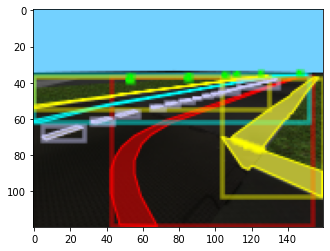

In [15]:

for d in random.sample(dataset_dicts, 3):
    print(d["file_name"])
    img = cv2.imread(d["file_name"])
    visualizer = DuckieVisualizer(img[:, :, ::-1], metadata=duckie_metadata, scale=0.5, instance_mode=ColorMode.IMAGE_BW)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])
    #print(d)

In [95]:
#dataset_dicts = get_balloon_dicts("balloon/train")
dataset_dicts = DatasetCatalog.get("duckie_merged_val")
duckie_metadata = MetadataCatalog.get("duckie_merged_val")
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import GenericMask, _create_text_labels



[12/07 16:44:18 d2.data.datasets.coco]: Loading ../data/duckie_merged_val.json takes 1.78 seconds.
[12/07 16:44:18 d2.data.datasets.coco]: Loaded 10559 images in COCO format from ../data/duckie_merged_val.json


In [109]:
filenames  =[]
for blip in dataset_dicts:
    if "js" in blip["file_name"]:
        filenames.append(blip["file_name"])
print(len(filenames))

1000


../data/dt_segmentation_dataset/merged/rgb/sim_48117.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_59436.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_7513.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_12118.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_27804.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_20460.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_52738.jpg
../data/dt_segmentation_dataset/merged/rgb/js_5811.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_26642.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_3652.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_43863.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_51696.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_53523.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_17657.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_56628.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_43156.jpg
../data/dt_segmentation_dataset/merged/rgb/sim_6639.jpg
../data/dt_segmentation_dataset/merg

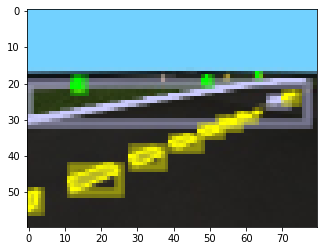

In [110]:
for d in random.sample(dataset_dicts, 20):
    print(d["file_name"])
    img = cv2.imread(d["file_name"])
    visualizer = DuckieVisualizer(img[:, :, ::-1], metadata=duckie_metadata, scale=0.5, instance_mode=ColorMode.IMAGE_BW)
    out = visualizer.draw_dataset_dict(d)
    if "js" in d["file_name"]:
        cv2_imshow(out.get_image()[:, :, ::-1])
    #print(d)

[12/07 15:22:42 d2.data.datasets.coco]: Loading ../data/duckie_sim_train.json takes 6.00 seconds.
[12/07 15:22:42 d2.data.datasets.coco]: Loaded 50000 images in COCO format from ../data/duckie_sim_train.json


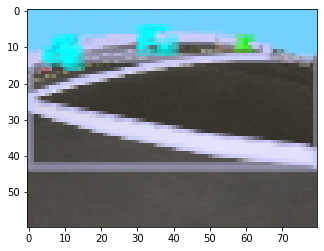

In [12]:
#dataset_dicts = get_balloon_dicts("balloon/train")
dataset_dicts = DatasetCatalog.get("duckie_train")
duckie_metadata = MetadataCatalog.get("duckie_train")
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import GenericMask, _create_text_labels

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = DuckieVisualizer(img[:, :, ::-1], metadata=duckie_metadata, scale=0.5, instance_mode=ColorMode.IMAGE_BW)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])
    #print(d)

[12/07 15:22:53 d2.data.datasets.coco]: Loaded 10000 images in COCO format from ../data/duckie_js_train.json


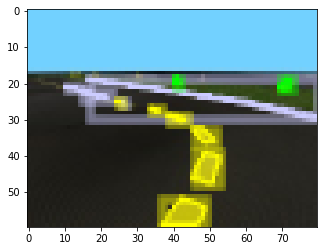

In [13]:
#dataset_dicts = get_balloon_dicts("balloon/train")
dataset_dicts = DatasetCatalog.get("duckie_js_train")
duckie_metadata = MetadataCatalog.get("duckie_js_train")
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import GenericMask, _create_text_labels

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = DuckieVisualizer(img[:, :, ::-1], metadata=duckie_metadata, scale=0.5, instance_mode=ColorMode.IMAGE_BW)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])
    #print(d)

[11/16 20:23:44 d2.data.datasets.coco]: Loaded 175 images in COCO format from ../data/duckie_real_train.json


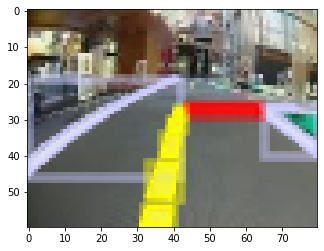

In [30]:
#dataset_dicts = get_balloon_dicts("balloon/train")
dataset_dicts = DatasetCatalog.get("duckie_real_train")
duckie_metadata = MetadataCatalog.get("duckie_real_train")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = DuckieVisualizer(img[:, :, ::-1], metadata=duckie_metadata, scale=0.5, instance_mode=ColorMode.IMAGE_BW)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])
    #print(d)

In [39]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("duckie_real_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 6
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 3600    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

[11/16 20:28:00 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [40]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = "../notebooks/output/model_final.pth"  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[11/16 20:30:32 d2.data.datasets.coco]: Loading ../data/duckie_sim_val.json takes 1.30 seconds.
[11/16 20:30:32 d2.data.datasets.coco]: Loaded 9559 images in COCO format from ../data/duckie_sim_val.json
AFasa
AFasa
AFasa


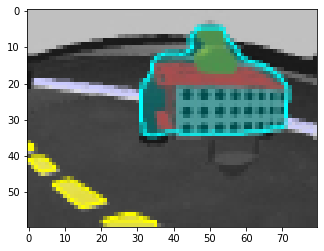

In [42]:

import types
import numpy as np
from utils import DuckieVisualizer
from detectron2.utils.visualizer import ColorMode
#dataset_dicts = get_balloon_dicts("balloon/val")
dataset_dicts = DatasetCatalog.get("duckie_val")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = DuckieVisualizer(im[:, :, ::-1],
                   metadata=duckie_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    #v.draw_instance_predictions = types.MethodType(custom_draw_instance_predictions, v)
    #v.draw_instance_predictions=custom_draw_instance_predictions
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

In [43]:

from detectron2.utils.visualizer import ColorMode
im = cv2.imread("../data/dt_segmentation_dataset/real/imgs/frame1451.jpg")
#cv2_imshow(im)

AFasa


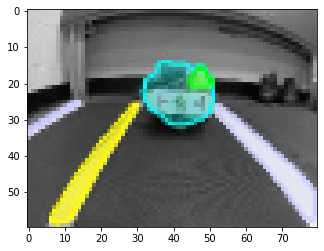

In [44]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55   # set a custom testing threshold
predictor = DefaultPredictor(cfg)
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = DuckieVisualizer(im[:, :, ::-1],
               metadata=duckie_metadata, 
               scale=0.5, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
#v.draw_instance_predictions = types.MethodType(custom_draw_instance_predictions, v)
#v.draw_instance_predictions=custom_draw_instance_predictions
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])